# Libraries

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# Import data

In [2]:
#2.1
chess_games = pd.read_csv('chess_games.csv', header= None, skiprows= 1)
chess_games.columns = ['game_id',
                       'game_is_rated',
                       'start_time',
                       'end_time',
                       'number_of_moves',
                       'game_outcome',
                       'winner',
                       'time_increment',
                       'white_piece_player_id',
                       'white_piece_player_rating',
                       'black_piece_player_id',
                       'black_piece_player_rating',
                       'all_moves_in_standard_chess_notation',
                       'standardised_code_for_any_given_opening_moves',
                       'opening_moves_name',
                       'number_of_moves_in_the_opening_phase']

# Inspect data

In [3]:
#dispaly first 20 records
chess_games.head(10)

,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
0,TZJHLljE,False,1504210000000,1504210000000,13.0,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16.0,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61.0,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61.0,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95.0,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1504240000000,1504240000000,5.0,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1504230000000,1504230000000,33.0,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1503680000000,1503680000000,9.0,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1503510000000,1503510000000,66.0,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1503440000000,1503440000000,119.0,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [4]:
#Stats summary of all features
chess_games.describe(include="all")

,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
count,20058,20058,2.005800e+04,2.005800e+04,19931.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.481361,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.575359,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


In [5]:
# Displaying the data type for each column.
chess_games.dtypes

game_id                                           object
game_is_rated                                       bool
start_time                                         int64
end_time                                           int64
number_of_moves                                  float64
game_outcome                                      object
winner                                            object
time_increment                                    object
white_piece_player_id                             object
white_piece_player_rating                          int64
black_piece_player_id                             object
black_piece_player_rating                          int64
all_moves_in_standard_chess_notation              object
standardised_code_for_any_given_opening_moves     object
opening_moves_name                                object
number_of_moves_in_the_opening_phase               int64
dtype: object

In [6]:
#row cont and column count
print('The row count is: ', chess_games.shape[0])
print('The column count is: ', chess_games.shape[1])

The row count is:  20058
The column count is:  16


# Conting and size

In [7]:
#displays the total of each column
chess_games.count()



game_id                                          20058
game_is_rated                                    20058
start_time                                       20058
end_time                                         20058
number_of_moves                                  19931
game_outcome                                     20058
winner                                           20058
time_increment                                   20058
white_piece_player_id                            20058
white_piece_player_rating                        20058
black_piece_player_id                            20058
black_piece_player_rating                        20058
all_moves_in_standard_chess_notation             20058
standardised_code_for_any_given_opening_moves    20058
opening_moves_name                               20058
number_of_moves_in_the_opening_phase             20058
dtype: int64

In [14]:
#display the total of the whole dataset
print('Existing elements in the dataset: ',chess_games.count()) #note here that the size isn't as the GROUBY size() with bracket

Existing elements in the dataset:  game_id                                          20058
game_is_rated                                    20058
start_time                                       20058
end_time                                         20058
number_of_moves                                  19931
game_outcome                                     20058
winner                                           20058
time_increment                                   20058
white_piece_player_id                            20058
white_piece_player_rating                        20058
black_piece_player_id                            20058
black_piece_player_rating                        20058
all_moves_in_standard_chess_notation             20058
standardised_code_for_any_given_opening_moves    20058
opening_moves_name                               20058
number_of_moves_in_the_opening_phase             20058
dtype: int64


In [15]:
#Get max and min from two  columns of same
#note the double [[]] square brackets
#Lowest and highest ratings in both columns
print('Highest rated player: ',chess_games[['black_piece_player_rating','white_piece_player_rating']].max().max())
print('Lowest rated player: ',chess_games[['black_piece_player_rating','white_piece_player_rating']].min().min())

#print(chess_games.white_piece_player_rating.max())
#print(chess_games.black_piece_player_rating.min())
#print(chess_games.white_piece_player_rating.min())


Highest rated player:  2723
Lowest rated player:  784


In [16]:
#count no. game of eah different game outcome
G_Outcome=chess_games.groupby('game_outcome').size()
G_Outcome

game_outcome
draw           906
mate          6325
outoftime     1680
resign       11147
dtype: int64

In [17]:
#% of games that ended in 'mate'
#we 1st fine the mate data the divide with whole dataset
Mate_games = chess_games[(chess_games['game_outcome']== 'mate')]
print('The mate % of game outcomes: ', round((len(Mate_games)/float(len(chess_games))*100),2), '%')

The mate % of game outcomes:  31.53 %


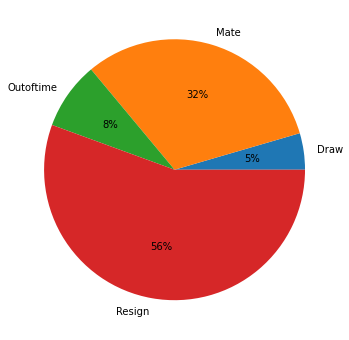

In [18]:
#plot the pie chat to show % of different game outcomes
#
plt.pie(G_Outcome,labels=['Draw','Mate','Outoftime', 'Resign'],autopct ='%.0f%%' )
fig = plt.gcf()
fig.set_size_inches(6,6)


# Balancing data

In [13]:
#data professor TYPe - IMBALANCE
#1st link >>2nd link

In [19]:
#1 to whta we grouped by
X = chess_games.drop(['game_outcome'], axis=1)
y = chess_games['game_outcome']

In [20]:
#2 add another library

from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)



In [22]:
#3 ADD pd.concat
concatenate = pd.concat([X_res, y_res], axis=1)
game_resampled=concatenate.groupby('game_outcome').size() #PP1
game_resampled

game_outcome
draw         11147
mate         11147
outoftime    11147
resign       11147
dtype: int64

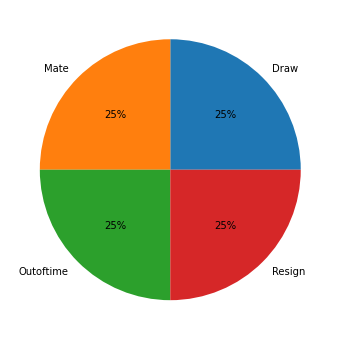

In [23]:
plt.pie(game_resampled,labels=['Draw','Mate','Outoftime', 'Resign'],autopct ='%.0f%%' )
fig = plt.gcf()
fig.set_size_inches(6,6)

# Most occcuring number

In [24]:
print(chess_games[['black_piece_player_rating','white_piece_player_rating']].mode().mode())

#chess_game['black_piece_player_rating'].mode()

   black_piece_player_rating  white_piece_player_rating
0                       1500                       1500


In [18]:
chess_games.head(5)

,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
0,TZJHLljE,False,1504210000000,1504210000000,13.0,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16.0,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61.0,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61.0,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95.0,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [22]:
#Col1 (Winner) and Col2 (game_outcome)
#White pieces 'LOSSES' then black wins
#The first col gets big denominator
black_wins = chess_games[(chess_games['winner'] == 'black')]
white_lose = chess_games[(chess_games['winner'] == 'black')&(chess_games['game_outcome']=='resign')]
print('white losses: ', round((len(white_lose)/float(len(black_wins)))*100,2),"%")

white losses:  58.23 %


In [28]:
#Determine and display the average number of (full/completed) moves for games that ended in a "draw".
#note avg is based on numbers only >>>comes after average will get mean()
#col1 (number of moves) AND col2(game_outcome)  
avg_draw = chess_games[(chess_games['game_outcome'] == 'draw')]
print('The average of draw game' , int(avg_draw['number_of_moves'].mean())) #DS

The average of draw game 83


In [27]:
print(f"Team: {chess_games['winner'].unique()}\n")
print(f"Team: {chess_games['game_outcome'].unique()}\n")

Team: ['white' 'black' 'draw']

Team: ['outoftime' 'resign' 'mate' 'draw']



In [30]:
winner = chess_games.groupby('winner').size()
winner

winner
black     9107
draw       950
white    10001
dtype: int64

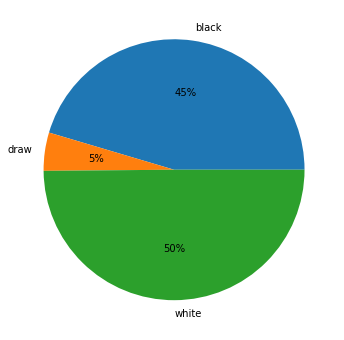

In [33]:
plt.pie(winner,labels=['black','draw','white'],autopct ='%.0f%%' )
fig = plt.gcf()
fig.set_size_inches(6,6)

In [34]:
#2.15
chess_games.isnull().sum()

game_id                                            0
game_is_rated                                      0
start_time                                         0
end_time                                           0
number_of_moves                                  127
game_outcome                                       0
winner                                             0
time_increment                                     0
white_piece_player_id                              0
white_piece_player_rating                          0
black_piece_player_id                              0
black_piece_player_rating                          0
all_moves_in_standard_chess_notation               0
standardised_code_for_any_given_opening_moves      0
opening_moves_name                                 0
number_of_moves_in_the_opening_phase               0
dtype: int64

In [51]:
#Filling in Null values with info from other columns
#NOT with mean()
#since 'Number of moves' has null, check for column that has "ALL move..."
#we replace with that col
all_moves= chess_games['all_moves_in_standard_chess_notation'].str.split('').apply(lambda x: len(x))
chess_games['number_of_moves'] = chess_games['number_of_moves'].fillna(all_moves)
chess_games.head(5)

,game_id,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,time_increment,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,all_moves_in_standard_chess_notation,standardised_code_for_any_given_opening_moves,opening_moves_name,number_of_moves_in_the_opening_phase
0,TZJHLljE,False,1504210000000,1504210000000,13.0,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16.0,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1504130000000,1504130000000,61.0,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1504110000000,1504110000000,61.0,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1504030000000,1504030000000,95.0,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [52]:
chess_games.isnull().sum()

game_id                                          0
game_is_rated                                    0
start_time                                       0
end_time                                         0
number_of_moves                                  0
game_outcome                                     0
winner                                           0
time_increment                                   0
white_piece_player_id                            0
white_piece_player_rating                        0
black_piece_player_id                            0
black_piece_player_rating                        0
all_moves_in_standard_chess_notation             0
standardised_code_for_any_given_opening_moves    0
opening_moves_name                               0
number_of_moves_in_the_opening_phase             0
dtype: int64

# Cleaning data

In [54]:
#2.17
chess_games.drop(['game_id', 'time_increment', 'all_moves_in_standard_chess_notation','opening_moves_name'], axis=1, inplace=True)
chess_games.head(5)

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,standardised_code_for_any_given_opening_moves,number_of_moves_in_the_opening_phase
0,False,1504210000000,1504210000000,13.0,outoftime,white,bourgris,1500,a-00,1191,D10,5
1,True,1504130000000,1504130000000,16.0,resign,black,a-00,1322,skinnerua,1261,B00,4
2,True,1504130000000,1504130000000,61.0,mate,white,ischia,1496,a-00,1500,C20,3
3,True,1504110000000,1504110000000,61.0,mate,white,daniamurashov,1439,adivanov2009,1454,D02,3
4,True,1504030000000,1504030000000,95.0,mate,white,nik221107,1523,adivanov2009,1469,C41,5


# Converting text to Binary/Numeric

In [58]:
#first check for uniqueness
#OnlyLEAVE ones specified, and INCLUDE mixed text and numbers
print(f"game_is_rated: {chess_games['game_is_rated'].unique()}\n")
print(f"game_outcome: {chess_games['game_outcome'].unique()}\n")
print(f"winner: {chess_games['winner'].unique()}\n")

game_is_rated: [False  True]

game_outcome: ['outoftime' 'resign' 'mate' 'draw']

winner: ['white' 'black' 'draw']



In [61]:
#for binary and categories
label_encoder = LabelEncoder()

chess_games['game_is_rated'] = label_encoder.fit_transform(chess_games['game_is_rated'])
chess_games['game_outcome'] = label_encoder.fit_transform(chess_games['game_outcome'])
chess_games['winner'] = label_encoder.fit_transform(chess_games['winner'])

chess_games.head(5)

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,standardised_code_for_any_given_opening_moves,number_of_moves_in_the_opening_phase
0,0,1504210000000,1504210000000,13.0,2,2,bourgris,1500,a-00,1191,D10,5
1,1,1504130000000,1504130000000,16.0,3,0,a-00,1322,skinnerua,1261,B00,4
2,1,1504130000000,1504130000000,61.0,1,2,ischia,1496,a-00,1500,C20,3
3,1,1504110000000,1504110000000,61.0,1,2,daniamurashov,1439,adivanov2009,1454,D02,3
4,1,1504030000000,1504030000000,95.0,1,2,nik221107,1523,adivanov2009,1469,C41,5


# Correlattion

In [62]:
#Whne not asked to make the correlation based on "any column"
#then exclude the 2nd line
corr = chess_games.corr() #CALCULATE CORR matrix
corr

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_rating,black_piece_player_rating,number_of_moves_in_the_opening_phase
game_is_rated,1.000000,-0.001171,-0.001176,0.090698,0.004556,-0.006722,0.003284,0.032655,-0.001906
start_time,-0.001171,1.000000,1.000000,0.083185,0.012867,-0.019503,0.116170,0.133316,0.100201
end_time,-0.001176,1.000000,1.000000,0.083196,0.012865,-0.019503,0.116172,0.133318,0.100203
number_of_moves,0.090698,0.083185,0.083196,1.000000,-0.214608,-0.044346,0.129753,0.160467,0.055999
game_outcome,0.004556,0.012867,0.012865,-0.214608,1.000000,0.002210,0.110852,0.109694,0.063809
winner,-0.006722,-0.019503,-0.019503,-0.044346,0.002210,1.000000,0.141700,-0.166815,0.020669
white_piece_player_rating,0.003284,0.116170,0.116172,0.129753,0.110852,0.141700,1.000000,0.634171,0.277379
black_piece_player_rating,0.032655,0.133316,0.133318,0.160467,0.109694,-0.166815,0.634171,1.000000,0.255396
number_of_moves_in_the_opening_phase,-0.001906,0.100201,0.100203,0.055999,0.063809,0.020669,0.277379,0.255396,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation')

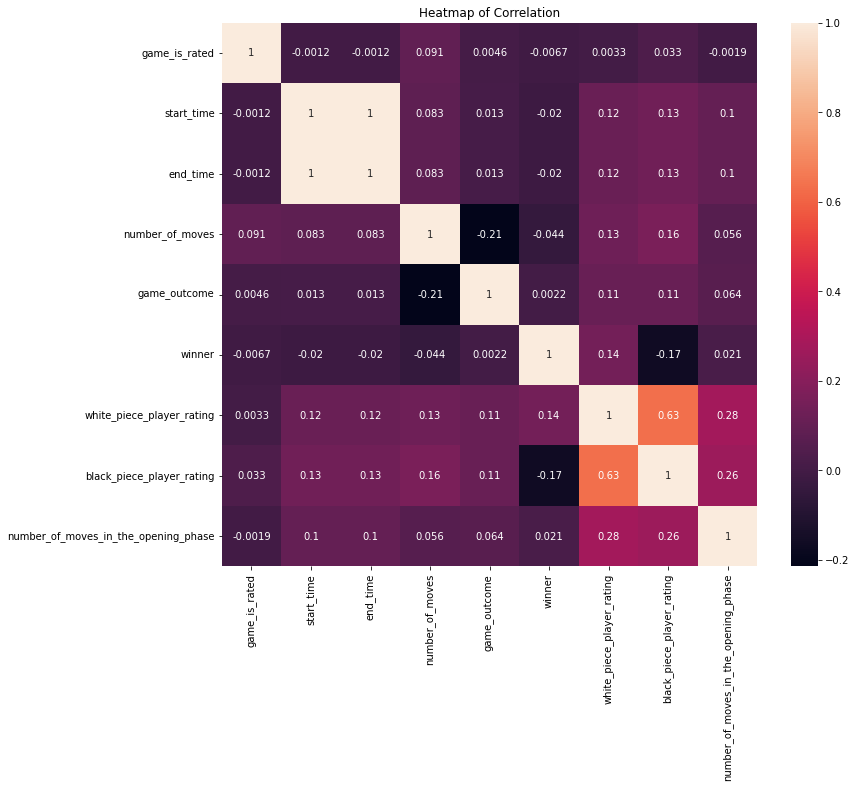

In [64]:
import seaborn as sns #PP1
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr, annot = True) #corr['pred']
plt.title('Heatmap of Correlation')

# Convert text to Vector Space

In [71]:
print(f"Standardised code for any given opening moves: {chess_games['standardised_code_for_any_given_opening_moves'].unique()}\n")

Standardised code for any given opening moves: ['opp_D10' 'opp_B00' 'opp_C20' 'opp_D02' 'opp_C41' 'opp_B27' 'opp_D00'
 'opp_C50' 'opp_B01' 'opp_A00' 'opp_C02' 'opp_C00' 'opp_C57' 'opp_C55'
 'opp_A40' 'opp_B20' 'opp_A25' 'opp_B21' 'opp_D01' 'opp_C45' 'opp_D06'
 'opp_B52' 'opp_D20' 'opp_B06' 'opp_A45' 'opp_B77' 'opp_A21' 'opp_B70'
 'opp_B23' 'opp_B76' 'opp_C21' 'opp_A80' 'opp_A20' 'opp_A04' 'opp_C26'
 'opp_C44' 'opp_E10' 'opp_A41' 'opp_C01' 'opp_A10' 'opp_C18' 'opp_A47'
 'opp_C10' 'opp_D80' 'opp_D30' 'opp_D41' 'opp_A46' 'opp_D31' 'opp_C64'
 'opp_C24' 'opp_A43' 'opp_A08' 'opp_B03' 'opp_B29' 'opp_B02' 'opp_B13'
 'opp_B57' 'opp_E20' 'opp_E11' 'opp_C40' 'opp_C11' 'opp_C28' 'opp_B30'
 'opp_A56' 'opp_C65' 'opp_B90' 'opp_B50' 'opp_B51' 'opp_E00' 'opp_C70'
 'opp_B11' 'opp_B22' 'opp_B40' 'opp_B31' 'opp_B18' 'opp_C61' 'opp_C78'
 'opp_B10' 'opp_C22' 'opp_C54' 'opp_C68' 'opp_B12' 'opp_C77' 'opp_A42'
 'opp_C42' 'opp_D07' 'opp_B32' 'opp_A22' 'opp_C46' 'opp_B07' 'opp_A06'
 'opp_C60' 'opp_A07' 'opp_A02'

In [74]:
#get_dummies() It converts categorical data into dummy (separeted columns)
#CONVERT col to Vector space

#1. seperate the col=Dummy
vectors=pd.get_dummies(chess_games['standardised_code_for_any_given_opening_moves'])

#2. New edited clean data frame
chess_clean = pd.concat([chess_games,vectors], axis =1)

#3. Then drop the original column
chess_clean.drop(['standardised_code_for_any_given_opening_moves'], axis = 1, inplace=True )
chess_clean.head(5)

,game_is_rated,start_time,end_time,number_of_moves,game_outcome,winner,white_piece_player_id,white_piece_player_rating,black_piece_player_id,black_piece_player_rating,...,opp_E81,opp_E87,opp_E88,opp_E90,opp_E91,opp_E92,opp_E94,opp_E95,opp_E97,opp_E98
0,0,1504210000000,1504210000000,13.0,2,2,bourgris,1500,a-00,1191,...,0,0,0,0,0,0,0,0,0,0
1,1,1504130000000,1504130000000,16.0,3,0,a-00,1322,skinnerua,1261,...,0,0,0,0,0,0,0,0,0,0
2,1,1504130000000,1504130000000,61.0,1,2,ischia,1496,a-00,1500,...,0,0,0,0,0,0,0,0,0,0
3,1,1504110000000,1504110000000,61.0,1,2,daniamurashov,1439,adivanov2009,1454,...,0,0,0,0,0,0,0,0,0,0
4,1,1504030000000,1504030000000,95.0,1,2,nik221107,1523,adivanov2009,1469,...,0,0,0,0,0,0,0,0,0,0


# To ensure the data is in the same scale

In [89]:
#Search for " Scale Pandas" 1st link
#Use standardize fo same scale

std_scaler = StandardScaler()
chess_scaled = std_scaler.fit_transform(chess_clean.to_numpy())
chess_scaled = pd.DataFrame(chess_scaled, columns = chess_clean.columns)

#chess_scaled.head(20)  

ValueError: could not convert string to float: 'bourgris'

In [87]:
#To receive the data from csv with clean output, name "clean_chess_games.csv"
#DATAFRAME to_csv
chess_scaled.to_csv('clean_chess_games.csv', index = False)

NameError: name 'chess_scaled' is not defined